In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [6]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [8]:
y.index = y.name

In [10]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [12]:
y.index = pd.to_datetime(y.index)

In [14]:
# turn the nulls to 0
# assumption: nuls are 0s. Need to investigate
y = y.fillna(0.).sort_index()

# 3.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [17]:
# Create pytrends object
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Layoffs", "MacBook", "Apple CEO", "iPad", "Apple Share Price", "Recession", "Chip Costs",
            "Tech Giants", "iOS Update", "New iOS Features", "Google", "Blackberry", "Sell Old iPhone",
           "Taylor Swift Tickets", "Is the Earth Flat", "Hospital"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    #time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [19]:
X = df.resample("Q").mean()

In [21]:
# fix data
temp = pd.concat([y, X], axis = 1).dropna()
y = temp["BasicEPS"].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [28]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .1 (that reduces less than half of your variables). Plot a bar chart.

In [31]:
from sklearn.linear_model import Lasso

In [33]:
lasso = Lasso(alpha = 0.1)

In [35]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [37]:
coefficients = lasso.coef_

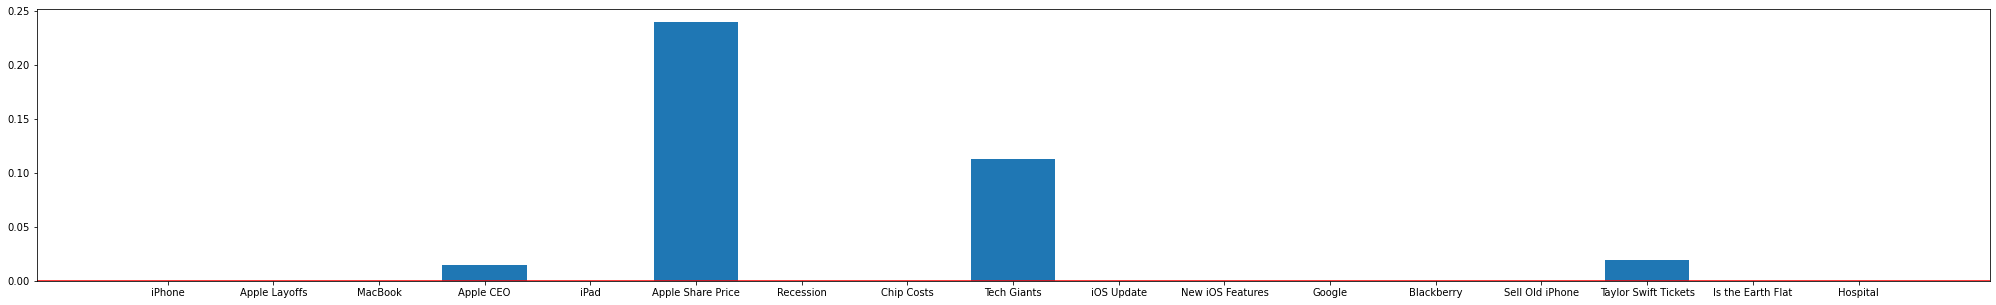

In [41]:
plt.figure(figsize = (35,5))
plt.bar(range(len(coefficients)), coefficients, tick_label = X.columns)
plt.axhline(0., color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Overall, these magnitudes make sense

* When trying to predict Apple's quarterly earnings, the magnitude of their share price trending logically is an important feature to consider
* Also, the buzz around the relevance of "tech giants" like Amazon, Google, and Meta will also be associated with Apple's quarterly earnings

However, some of the magnitudes are surprising

* It is surprising that the buzz around Apple's products, iOS updates, or new iOS features is less important of a feature than Taylor Swift Tickets
* Even the fact that the coefficient on Taylor Swift Tickets being (albeit slightly) higher than the coefficient on "Apple CEO" is also counterintuitive. 